In [1]:
from qiskit import pulse
from qiskit.pulse.library import Gaussian
from qiskit.test.mock import FakeValencia

backend = FakeValencia()

with pulse.build(backend, name='hadamard') as h_q0:
    pulse.play(Gaussian(duration=128, amp=0.1, sigma=16), pulse.drive_channel(0))

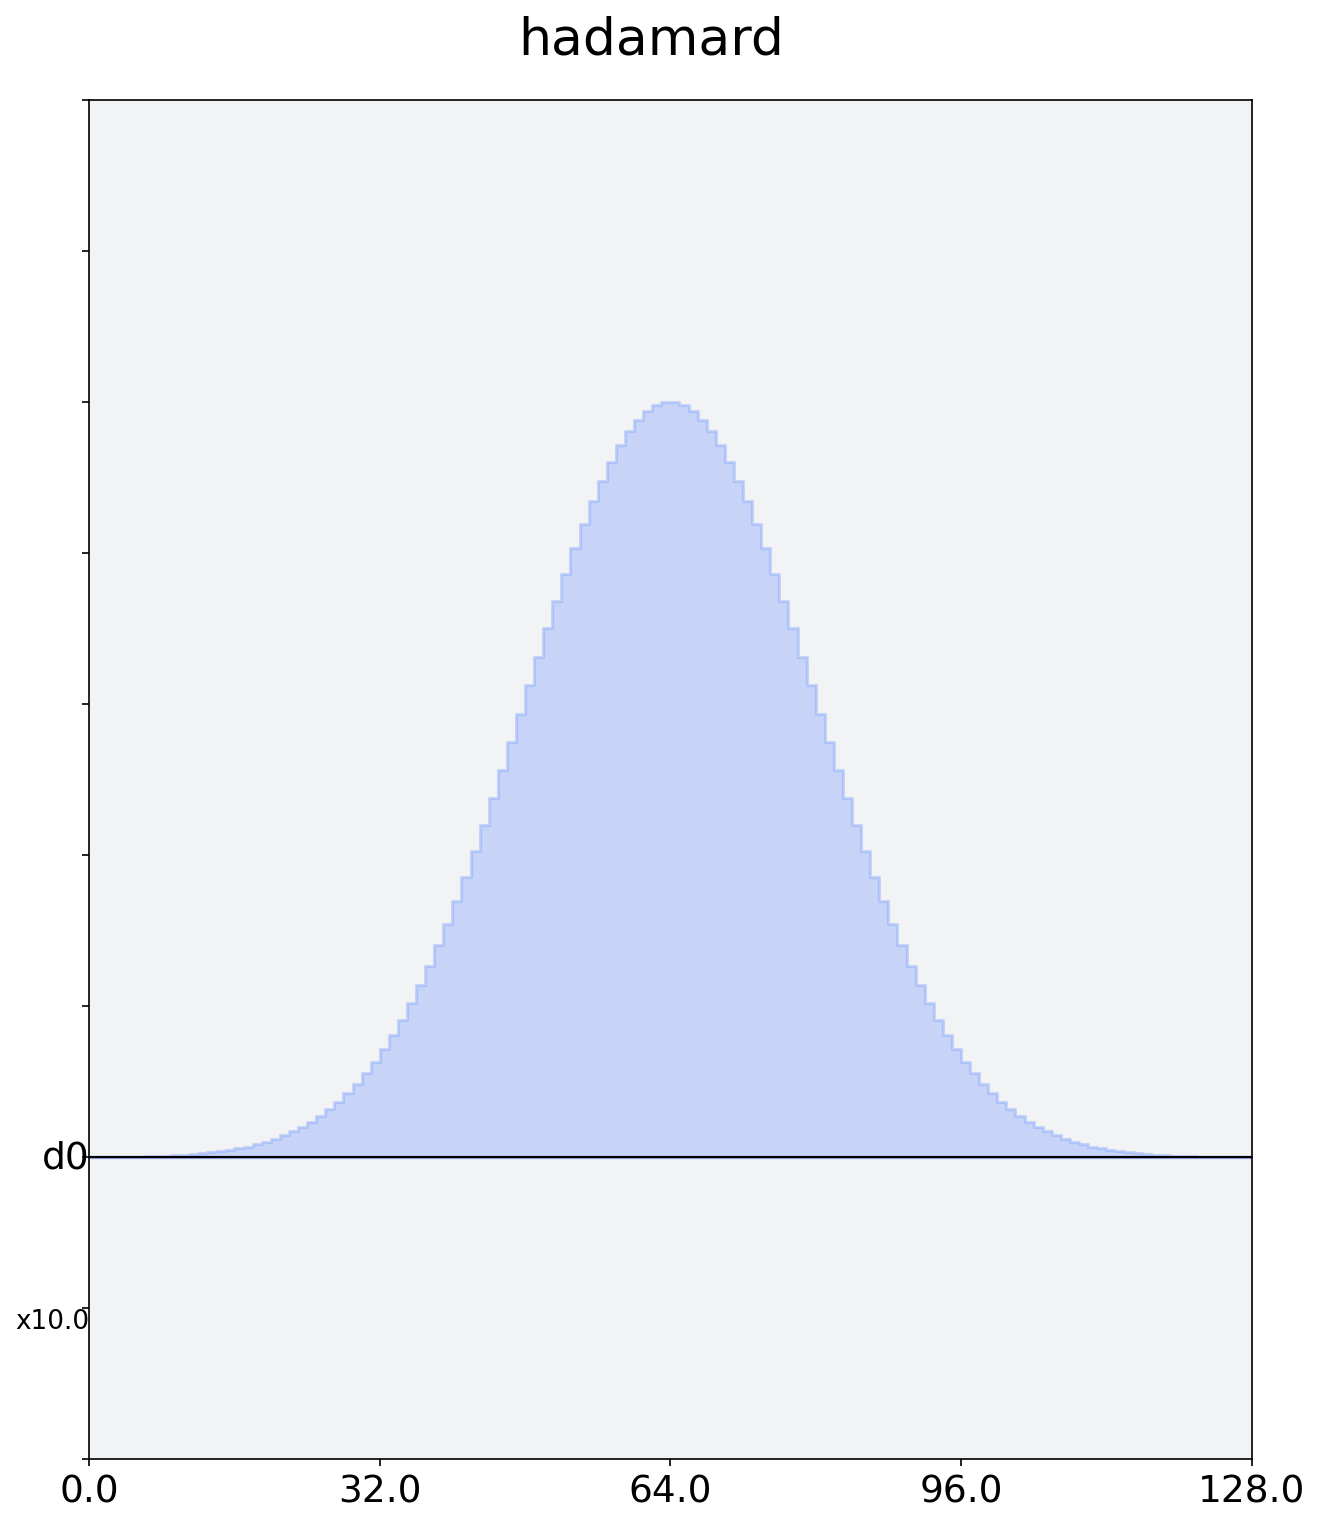

In [2]:
h_q0.draw()

In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate

circ = QuantumCircuit(1, 1)
custom_gate = Gate('my_custom_gate', 1, [440, 1])
# 3.14 is an arbitrary parameter for demonstration
circ.append(custom_gate, [0])
circ.measure(0, 0)

circ.draw()

┌───────────────────────┐┌─┐
q_0: ┤ my_custom_gate(440,1) ├┤M├
     └───────────────────────┘└╥┘
c: 1/══════════════════════════╩═
                               0

In [4]:
### https://qiskit.org/documentation/tutorials/circuits_advanced/07_pulse_scheduler.html

In [8]:
from qiskit import pulse
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from math import pi

circ = QuantumCircuit(2, 2)
# circ.cx(1, 0)
# circ.cx(1, 0)
# circ.x(0)
circ.u3(277,pi/4,pi/4,1) ## Theta angle is Note C#
circ.u3(262,pi/4,pi/4,1) ## Theta angle is Note C
#circ.u3(440,pi/4,pi/4,1) ## Theta angle is Note A
circ.measure([0, 1], [0, 1])

schedule = build_schedule(circ, backend,
                          method="as_late_as_possible")
schedule.draw(channels=[pulse.DriveChannel(0), pulse.DriveChannel(1)])

NameError: name 'build_schedule' is not defined

In [ ]:
from qiskit.pulse import DriveChannel

channel = DriveChannel(0)

from qiskit import pulse

with pulse.build() as schedule:
    pulse.play([0.001*i for i in range(160)], channel)
    
schedule.draw()

In [ ]:
import numpy as np

# unit conversion factors -> all backend properties returned in SI (Hz, sec, etc)
GHz = 1.0e9 # Gigahertz
MHz = 1.0e6 # Megahertz
us = 1.0e-6 # Microseconds
ns = 1.0e-9 # Nanoseconds